In [1]:
import pandas as pd
import numpy as np

# Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
# location. Perform following tasks: 
# 1. Pre-process the dataset. 
# 2. Identify outliers. 
# 3. Check the correlation. 
# 4. Implement linear regression and random forest regression models. 
# Evaluate the models and compare their respective scores like R2, RMSE, etc. 
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 


In [2]:

df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [6]:

x = df.iloc[:,0:-1].values
y = df.iloc[:,0].values

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:

df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x23b6c89ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x23b6c89f5f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b6b3f9220>],
 'medians': [<matplotlib.lines.Line2D at 0x23b6c89fbf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b6c89fec0>],
 'means': []}

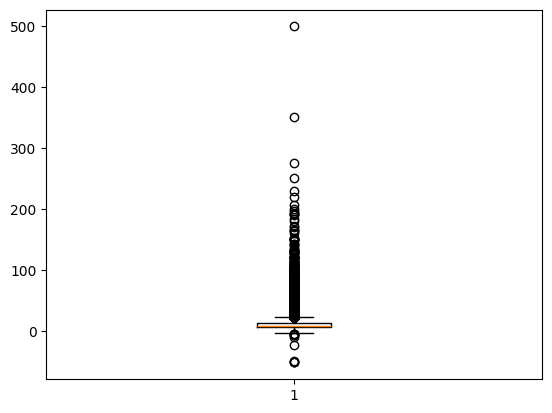

In [11]:

plt.boxplot(df["fare_amount"])

In [12]:

df = df[df["fare_amount"].apply(lambda x : x >= 0)]
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999820e+05,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000,199982.000000
mean,2.771227e+07,11.362302,-72.527508,39.935812,-72.525538,39.924024,1.684502
std,1.601394e+07,9.897102,11.438294,7.720883,13.116956,6.794527,1.385977
min,1.000000e+00,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382519e+07,6.000000,-73.992065,40.734795,-73.991407,40.733824,1.000000
50%,2.774498e+07,8.500000,-73.981823,40.752592,-73.980092,40.753042,1.000000
75%,4.155540e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:

df = df[df["passenger_count"].apply(lambda x : x <= 7)]
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999810e+05,199981.000000,199981.000000,199981.000000,199981.000000,199981.000000,199981.000000
mean,2.771223e+07,11.362300,-72.527501,39.935808,-72.525531,39.924020,1.683470
std,1.601397e+07,9.897127,11.438322,7.720902,13.116989,6.794544,1.306939
min,1.000000e+00,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382515e+07,6.000000,-73.992065,40.734795,-73.991407,40.733824,1.000000
50%,2.774484e+07,8.500000,-73.981823,40.752592,-73.980092,40.753042,1.000000
75%,4.155544e+07,12.500000,-73.967155,40.767158,-73.963658,40.768002,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x23b6eb0ed20>,
 'caps': [<matplotlib.lines.Line2D at 0x23b6eb0f260>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b6eb0eab0>],
 'medians': [<matplotlib.lines.Line2D at 0x23b6eb0f860>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b6eb0fb90>],
 'means': []}

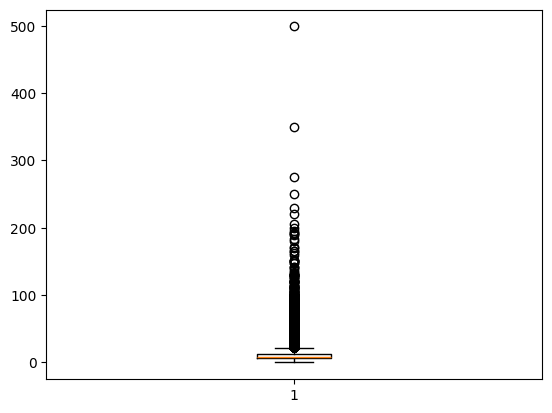

In [14]:

plt.boxplot(df["fare_amount"])

In [15]:

df.drop(columns='Unnamed: 0', inplace=True)

In [16]:

#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [17]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,194910.000000,194910.000000,194910.000000,194910.000000,194910.000000,194910.000000
mean,10.945171,-72.561774,39.955187,-72.571650,39.949669,1.685157
std,8.048888,11.359574,7.707148,13.055240,6.733612,1.308091
min,3.400000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.100000,-73.992127,40.735083,-73.991386,40.734125,1.000000
50%,8.500000,-73.981927,40.752718,-73.980133,40.753188,1.000000
75%,12.500000,-73.967572,40.767237,-73.963936,40.768062,2.000000
max,53.100000,57.418457,1644.421482,1153.572603,872.697628,6.000000


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:

X = df[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

In [20]:

X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

# X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: -0.00016452522494025956
RMSE: 8.033071449819028


In [21]:
df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [22]:

from sklearn.ensemble import RandomForestRegressor
# X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))

In [23]:

rfr_model = RandomForestRegressor(n_estimators=100, random_state = 101)
rfr_model.fit(X_train, y_train)
rfr_model_pred = rfr_model.predict(X_test)

KeyboardInterrupt: 